In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data.csv', header=0)

In [3]:
dataframe.head()

,Unnamed: 0,Date,Demand
0,96,1964-01,106.1
1,97,1964-02,102.1
2,98,1964-03,105.2
3,99,1964-04,101.0
4,100,1964-05,84.3


In [4]:
dataframe.columns

Index(['Unnamed: 0', 'Date', 'Demand'], dtype='object')

In [5]:
dataframe.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [6]:
dataframe

,Date,Demand
0,1964-01,106.1
1,1964-02,102.1
2,1964-03,105.2
3,1964-04,101.0
4,1964-05,84.3
...,...,...
116,1973-09,129.4
117,1973-10,174.1
118,1973-11,197.0
119,1973-12,193.9


In [7]:
dataframe.shape

(121, 2)

In [8]:
dataframe['Date'].dtype

dtype('O')

In [9]:
dataframe["Date"]= pd.to_datetime(dataframe["Date"])


In [10]:
dataframe['Date'].dtype

dtype('<M8[ns]')

In [11]:
dataframe.describe()

,Demand
count,121.000000
mean,125.844628
std,23.407392
min,84.300000
25%,107.100000
50%,123.700000
75%,138.400000
max,197.000000


In [12]:
dataframe['year'] = dataframe['Date'].dt.year

In [13]:
dataframe['month'] = dataframe['Date'].dt.month

In [14]:
dataframe.head(5)

,Date,Demand,year,month
0,1964-01-01,106.1,1964,1
1,1964-02-01,102.1,1964,2
2,1964-03-01,105.2,1964,3
3,1964-04-01,101.0,1964,4
4,1964-05-01,84.3,1964,5


In [15]:
dataframe.index = dataframe['Date'] 

In [16]:
demand = dataframe['Demand']


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
import matplotlib.pylab as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

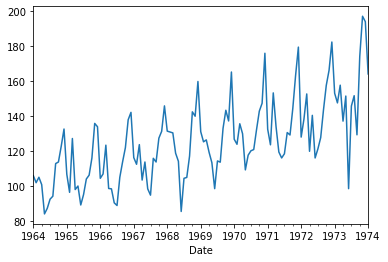

In [19]:
dataframe['Demand'].plot()

In [20]:
year1 = dataframe[(dataframe['Date'] > '1964-01-01') & (dataframe['Date'] <= '1968-01-1')].copy()

<AxesSubplot:xlabel='Date'>

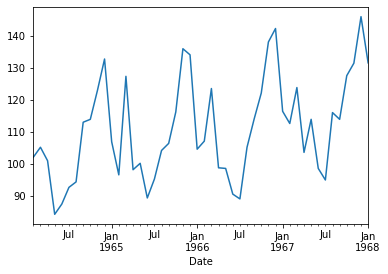

In [21]:
year1['Demand'].plot()

In [22]:
decomposition = seasonal_decompose(demand,freq=12)


<ipython-input-22-1c641f43c372>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(demand,freq=12)


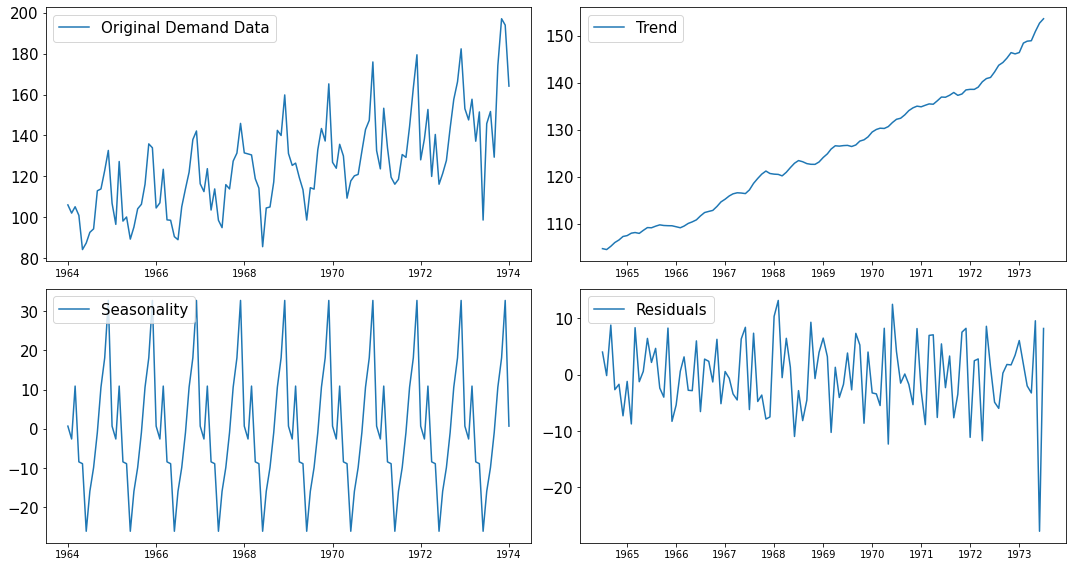

In [23]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
plt.plot(demand, label='Original Demand Data')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.subplot(2,2,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tight_layout()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [28]:
x = dataframe['Demand'].values

In [29]:
result = adfuller(x)

In [31]:
print("ADF statistics: %f" % result[0])
print("p-value: %f" % result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]["5%"]:
    print('Time series is stationary')
else:
    print('Time series is not stationary')

ADF statistics: 1.990182
p-value: 0.998660
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Time series is not stationary
